### Default of credit card clients dataset

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Citation Request:
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [681]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

In [682]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [683]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [684]:
dataset = pd.read_excel(r'E:\Data\credit_card_clients\default_of_credit_card_clients.xls')
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [685]:
clients = dataset.copy()
clients.drop('Unnamed: 0', axis =1, inplace = True)
columnNames = clients.iloc[0,:]
clients.set_axis(columnNames, axis=1, inplace = True)
clients = clients.iloc[1:,:]

In [687]:
print(clients.shape)
clients.info()

(30000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 

In [688]:
clients = clients.iloc[:,:].astype('int')
clients = clients.rename(columns={'default payment next month': 'PAYED'})

In [690]:
#Gender (1 = male; 2 = female)
clients['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [691]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
clients['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [692]:
#Marital status (1 = married; 2 = single; 3 = others).
clients['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [693]:
#removing wrong values of marriage and education columns.
clients.drop(clients.index[clients['MARRIAGE'] == 0], inplace = True)
clients.shape

(29946, 24)

In [694]:
print(clients['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64


In [695]:
dict1 =  {1: 'married', 2: 'single', 3: 'other'}
clients['MARRIAGE'] = clients['MARRIAGE'].map(dict1)

dict2 = {0: 'others', 1:'graduate school', 2: 'university', 3: 'high school', 4:'others', 5:'unknown', 6:'unknown'}
clients['EDUCATION']  =clients['EDUCATION'].map(dict2) 

dict3 = {1: 'Male', 2:'Female'}
clients['SEX']  =clients['SEX'].map(dict3)

In [696]:
print(clients['MARRIAGE'].value_counts())
print(clients['EDUCATION'].value_counts())
print(clients['SEX'].value_counts())

single     15964
married    13659
other        323
Name: MARRIAGE, dtype: int64
university         14024
graduate school    10581
high school         4873
unknown              331
others               137
Name: EDUCATION, dtype: int64
Female    18072
Male      11874
Name: SEX, dtype: int64


In [697]:
# summarize the shape of the dataset
print(clients.shape)
# summarize the class distribution
target = clients.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(29946, 24)
Class=1, Count=6631, Percentage=22.143%
Class=0, Count=23315, Percentage=77.857%


In [698]:
clients['DECADE'] = pd.cut(x = clients['AGE'], bins=[20, 29, 39, 49,59,69,79], labels=['20s', '30s', '40s', '50s','60s', '70s'])

In [700]:
cat_columns = clients.select_dtypes(include=['object']).columns
clients[cat_columns] =clients[cat_columns].astype('category')

In [701]:
ordColumns= clients.iloc[:,5:10].columns
cat_columns = clients.select_dtypes(include=['category']).columns

In [756]:
df = clients.copy()
y= df['PAYED']
df.drop('PAYED', axis = 1, inplace = True)
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle= True, stratify=y)

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

#balance training data
smote_nc = SMOTENC(categorical_features=[1,2,3,23], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(label_X_train, y_train)

#Ordinal feature encoding
ordinal_encoder = OrdinalEncoder()
X_resampled[ordColumns]  = ordinal_encoder.fit_transform(X_resampled[ordColumns])
label_X_test[ordColumns] = ordinal_encoder.transform(label_X_test[ordColumns])

In [757]:
#One hot enconding
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_resampled[cat_columns]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(label_X_test[cat_columns]))

In [758]:
#remove categorical features
X_resampled.drop('SEX', axis = 1, inplace = True)
X_resampled.drop('EDUCATION', axis = 1, inplace = True)
X_resampled.drop('MARRIAGE', axis = 1, inplace = True)
X_resampled.drop('DECADE', axis = 1, inplace = True)
X_resampled.drop('AGE', axis = 1, inplace = True)

label_X_test.drop('SEX', axis = 1, inplace = True)
label_X_test.drop('EDUCATION', axis = 1, inplace = True)
label_X_test.drop('MARRIAGE', axis = 1, inplace = True)
label_X_test.drop('DECADE', axis = 1, inplace = True)
label_X_test.drop('AGE', axis = 1, inplace = True)

In [759]:
X_train_full = pd.concat([X_resampled, OH_cols_train], axis=1)
X_test_full = pd.concat([label_X_test.reset_index(), OH_cols_test], axis=1)
X_test_full.drop('index', axis = 1, inplace = True)

In [760]:
#benchmark
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train_full,y_resampled)
y_pred= dummy.predict(X_test_full)
print('F1 score for DummyClassifier: {:2f} '.format(f1_score(y_test, y_pred, average='weighted')))

F1 score for DummyClassifier: 0.681689 


In [768]:
RF = RandomForestClassifier(n_estimators = 1000)
RF.fit(X_train_full,y_resampled)
y_pred= RF.predict(X_test_full)
print('F1 score for Randon Forest classifier: {:2f} '.format(f1_score(y_test, y_pred, average = 'weighted')))

F1 score for Randon Forest classifier: 0.787573 


In [722]:
ET = ExtraTreesClassifier(n_estimators = 1000)
ET.fit(X_train_full,y_resampled)
y_pred = ET.predict(X_test_full)
print('F1 score for Extra Trees Classifier: {:2f} '.format(f1_score(y_test, y_pred, average='weighted')))

F1 score for Extra Trees Classifier: 0.768839 


In [723]:
#For XGB
XGB = XGBClassifier()
XGB.fit(X_train_full,y_resampled)
y_pred = XGB.predict(X_test_full)
print('F1 score for XGBClassifier classifier: {:2f} '.format(f1_score(y_test, y_pred, average='weighted')))

F1 score for XGBClassifier classifier: 0.777417 


Feature: 0, Score: 0.0633
Feature: 1, Score: 0.0764
Feature: 2, Score: 0.0556
Feature: 3, Score: 0.0367
Feature: 4, Score: 0.0287
Feature: 5, Score: 0.0251
Feature: 6, Score: 0.0215
Feature: 7, Score: 0.0607
Feature: 8, Score: 0.0529
Feature: 9, Score: 0.0495
Feature: 10, Score: 0.0470
Feature: 11, Score: 0.0464
Feature: 12, Score: 0.0461
Feature: 13, Score: 0.0608
Feature: 14, Score: 0.0532
Feature: 15, Score: 0.0502
Feature: 16, Score: 0.0464
Feature: 17, Score: 0.0452
Feature: 18, Score: 0.0476
Feature: 19, Score: 0.0080
Feature: 20, Score: 0.0080
Feature: 21, Score: 0.0073
Feature: 22, Score: 0.0062
Feature: 23, Score: 0.0004
Feature: 24, Score: 0.0099
Feature: 25, Score: 0.0012
Feature: 26, Score: 0.0078
Feature: 27, Score: 0.0009
Feature: 28, Score: 0.0076
Feature: 29, Score: 0.0079
Feature: 30, Score: 0.0084
Feature: 31, Score: 0.0071
Feature: 32, Score: 0.0046
Feature: 33, Score: 0.0010
Feature: 34, Score: 0.0001


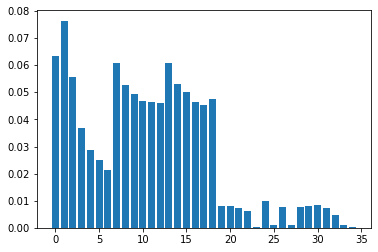

In [769]:
#Feature selection for Random Forest Classifier 
importance = RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {:.4f}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [815]:
#Feature selection
X_train_reduced = X_train_full.copy()
X_test_reduced = X_test_full.copy()

In [816]:
for i in reversed(range(X_train_reduced.shape[1])):
    if importance[i]< 0.01:
            X_train_reduced.drop(X_train_reduced.columns[i], axis = 1, inplace = True)
            X_test_reduced.drop(X_test_reduced.columns[i],  axis = 1, inplace = True)        

In [818]:
RF = RandomForestClassifier(n_estimators = 1000)
RF.fit(X_train_reduced,y_resampled)
y_pred= RF.predict(X_test_reduced)
print('F1 score for Randon Forest classifier: {:2f} '.format(f1_score(y_test, y_pred, average = 'weighted')))

F1 score for Randon Forest classifier: 0.786814 


Feature: 0, Score: 0.0659
Feature: 1, Score: 0.0855
Feature: 2, Score: 0.0623
Feature: 3, Score: 0.0393
Feature: 4, Score: 0.0298
Feature: 5, Score: 0.0235
Feature: 6, Score: 0.0196
Feature: 7, Score: 0.0713
Feature: 8, Score: 0.0586
Feature: 9, Score: 0.0542
Feature: 10, Score: 0.0512
Feature: 11, Score: 0.0504
Feature: 12, Score: 0.0505
Feature: 13, Score: 0.0701
Feature: 14, Score: 0.0591
Feature: 15, Score: 0.0558
Feature: 16, Score: 0.0511
Feature: 17, Score: 0.0487
Feature: 18, Score: 0.0530


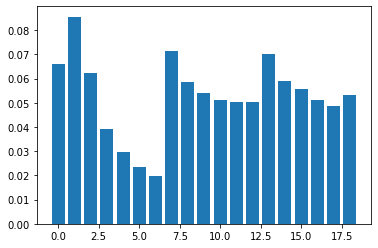

In [817]:
#Feature selection for Random Forest Classifier 
importance = RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {:.4f}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()